In [1]:
#import pandas for structuring the data
import pandas as pd

# import numpy for numerical analysis
import numpy as np

# import libs for diagrams inline with the text
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# other utilities
from sklearn import datasets, preprocessing, metrics

In [4]:
wqw = pd.read_excel('./winequality-white.xlsx', skiprows=1, index_col=None, na_values=['NA'])

In [3]:
wqw.shape

(4898, 12)

In [4]:
wqw.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1422,5.3,0.165,0.24,1.1,0.051,25.0,105.0,0.99250,3.32,0.47,9.1,5
1297,7.3,0.420,0.38,6.8,0.045,29.0,122.0,0.99250,3.19,0.37,12.6,7
1120,6.7,0.105,0.32,12.4,0.051,34.0,106.0,0.99800,3.54,0.45,9.2,6
4453,6.6,0.380,0.29,2.9,0.035,15.0,101.0,0.98916,3.04,0.37,12.5,6
2947,5.1,0.290,0.28,8.3,0.026,27.0,107.0,0.99308,3.36,0.37,11.0,6
2024,8.0,0.430,0.40,12.4,0.168,29.0,190.0,0.99910,3.07,0.64,9.2,5
1015,7.6,0.390,0.22,2.8,0.036,19.0,113.0,0.99260,3.03,0.29,10.2,5
2836,6.5,0.220,0.45,8.0,0.053,52.0,196.0,0.99590,3.23,0.48,9.1,6
2712,6.4,0.210,0.44,7.4,0.045,47.0,182.0,0.99570,3.24,0.46,9.1,5
428,7.8,0.210,0.27,1.2,0.051,20.0,89.0,0.99360,3.06,0.46,9.1,5


In [5]:
wqr = pd.read_excel('./winequality-red.xlsx', skiprows=1, index_col=None, na_values=['NA'])

In [6]:
wqr.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.99740,3.26,1.56,9.1,5
450,11.9,0.39,0.69,2.8,0.095,17.0,35.0,0.99940,3.10,0.61,10.8,6
199,6.9,1.09,0.06,2.1,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4
1306,9.7,0.69,0.32,2.5,0.088,22.0,91.0,0.99790,3.29,0.62,10.1,5
322,7.8,0.62,0.05,2.3,0.079,6.0,18.0,0.99735,3.29,0.63,9.3,5
174,7.3,0.38,0.21,2.0,0.080,7.0,35.0,0.99610,3.33,0.47,9.5,5
449,11.9,0.39,0.69,2.8,0.095,17.0,35.0,0.99940,3.10,0.61,10.8,6
1216,7.9,0.57,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5,6
1444,7.3,0.67,0.02,2.2,0.072,31.0,92.0,0.99566,3.32,0.68,11.1,6
274,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4,5


In [ ]:
wqw.isnull().sum()

In [ ]:
wqr.isnull().sum()

In [7]:
wqr['type']=0
wqw['type']=1

In [8]:
wine = pd.concat([wqw, wqr], ignore_index=True)

In [ ]:
wine.head()

In [6]:
wine.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5689,8.8,0.640,0.17,2.90,0.084,25.0,130.0,0.99818,3.23,0.54,9.600000,5,0
4933,7.8,0.645,0.00,5.50,0.086,5.0,18.0,0.99860,3.40,0.55,9.600000,6,0
4731,5.3,0.310,0.38,10.50,0.031,53.0,140.0,0.99321,3.34,0.46,11.700000,6,1
4937,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.500000,5,0
5736,10.1,0.310,0.35,1.60,0.075,9.0,28.0,0.99672,3.24,0.83,11.200000,7,0
1159,7.8,0.300,0.29,16.85,0.054,23.0,135.0,0.99980,3.16,0.38,9.000000,6,1
5336,10.4,0.410,0.55,3.20,0.076,22.0,54.0,0.99960,3.15,0.89,9.900000,6,0
2588,6.8,0.180,0.30,12.80,0.062,19.0,171.0,0.99808,3.00,0.52,9.000000,7,1
5828,6.6,0.610,0.01,1.90,0.080,8.0,25.0,0.99746,3.69,0.73,10.500000,5,0
2755,6.6,0.340,0.18,6.40,0.082,47.0,240.0,0.99710,3.42,0.48,9.200000,5,1


In [ ]:
wine.shape

In [ ]:
wine.describe()

In [9]:
winecor=wine.corr()

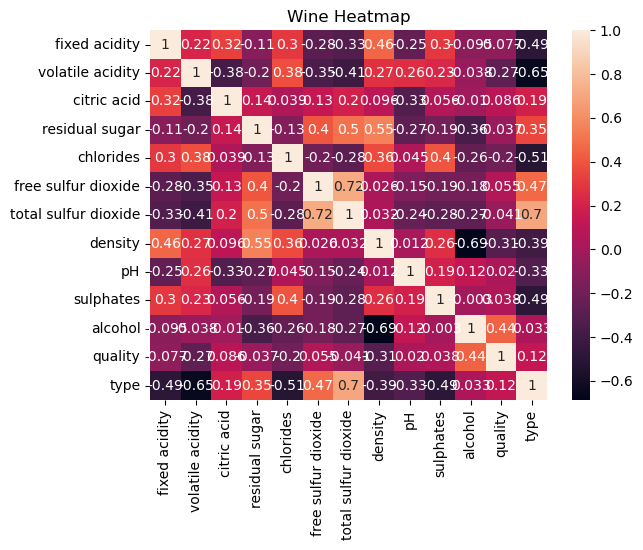

In [10]:
sns.heatmap(winecor, annot=True)

plt.title('Wine Heatmap')

plt.show()

In [ ]:
wine.reset_index()